In [1]:
## Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sqlite3    ## SQL Interface
import pickle     ## Used to save your data - Converts objects to byte stream and vice versa

from sklearn.feature_extraction.text import CountVectorizer  ## BOW Model
from sklearn.feature_extraction.text import TfidfVectorizer  ## TFIDF Model

from sklearn.manifold import TSNE    ## To visualize high dimensional data

## Modules to perform Text Preprocessing
import re
import nltk

from nltk.corpus import stopwords
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
%matplotlib inline


import gensim    ## To build Word2Vec model

C:\Users\shravan\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\shravan\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## final.sqlite contains preprocessed data and is shuffled with random state =123

In [2]:
con=sqlite3.connect("saved_data//final.sqlite")
final=pd.read_sql_query("select * from Reviews",con)
con.close

<function Connection.close>

In [3]:
final

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,540125,B002W08W56,A2STPOZAT37RNE,Betty Baker,1,1,1,1300320000,"Wonderful, but surprised to find this size can...",Great beans....the best texture hands down. T...,great bean best textur hand seem great tast do...
1,31761,B000UXWQMC,A3AKMRCK9C8KWO,Traveller,3,4,1,1263686400,Better than store bought,We bought the Roland Kalamata Halves (Barchett...,bought roland kalamata halv barchetta recent e...
2,509496,B000P09RJA,A29WSMQQ9WTM7E,Kari Carper,0,0,1,1286496000,Better than a regular granola bar,These bars are very tasty (as are the chocolat...,bar tasti chocol strawberri theyr larger regul...
3,27728,B000K8ESBY,A1RYTIMIWPDJ4O,"Bill Ison ""Bill""",0,0,1,1256169600,Coffee flavoring,"<a href=""http://www.amazon.com/gp/product/B000...",flavour creation coffe flavor tablet french va...
4,128657,B001AVJT0K,AJ6SZ4YAPOOO7,Mwebi,0,0,1,1348099200,They all come running,"I have the pickiest cats, they hate 99/100 kin...",pickiest cat hate kind food better vari otherw...
5,399982,B002IEVJRY,A3LXXYBYUHZWS5,Monica Garcia,0,0,1,1334102400,A pretty good Starbucks replacement,I love frappucinos from Starbucks so I decided...,love frappucino starbuck decid give one tri al...
6,393311,B006GIS3EA,A250FFYP8R4OMJ,Cee H,0,0,0,1344902400,disappointing,I don't know if I got a bad box but mine did n...,dont know got bad box mine not resembl pictur ...
7,59452,B000FBQ5GW,A1TPJYBZVDMP4G,Venkatesh Nagarajan,0,0,1,1252713600,Excellent..,Now it is available only through nutricity. Th...,avail nutric avail status wrong order aug toda...
8,96635,B008KZ5KZ2,A3G1VVKZ3DJS76,"M. Krumm ""mom of three""",0,0,1,1346284800,Best Gluten Free Cookie Mix on the Market,We all know there are good and bad gluten free...,know good bad gluten free product rare find on...
9,506467,B003V8Y5KY,A2VJV5HA2C20E4,Willa,0,0,1,1340064000,Housewife,"Our family loves this product, and my daughter...",famili love product daughter like especi must ...


### creating bag of words for all the rows in CleanedText column

In [4]:
bow=CountVectorizer()
bow_vector=bow.fit_transform(final["CleanedText"].values)

### taking subset of first 2000 points

In [5]:
df1=final["Score"][:2000]

In [8]:
df1

0       1
1       1
2       1
3       1
4       1
5       1
6       0
7       1
8       1
9       1
10      0
11      1
12      0
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
1970    1
1971    1
1972    1
1973    1
1974    1
1975    1
1976    1
1977    1
1978    1
1979    1
1980    1
1981    1
1982    1
1983    1
1984    1
1985    1
1986    1
1987    1
1988    1
1989    1
1990    1
1991    1
1992    1
1993    1
1994    1
1995    0
1996    1
1997    1
1998    1
1999    1
Name: Score, Length: 2000, dtype: int64

In [6]:
df2=pd.DataFrame(bow_vector[:2000,:].toarray())

In [7]:
data=pd.concat([df1,df2],axis=1)

In [8]:
data

,Score,0,1,2,3,4,5,6,7,8,...,71681,71682,71683,71684,71685,71686,71687,71688,71689,71690
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
Y=data["Score"]

In [59]:

Y

0       1
1       1
2       1
3       1
4       1
5       1
6       0
7       1
8       1
9       1
10      0
11      1
12      0
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
1970    1
1971    1
1972    1
1973    1
1974    1
1975    1
1976    1
1977    1
1978    1
1979    1
1980    1
1981    1
1982    1
1983    1
1984    1
1985    1
1986    1
1987    1
1988    1
1989    1
1990    1
1991    1
1992    1
1993    1
1994    1
1995    0
1996    1
1997    1
1998    1
1999    1
Name: Score, Length: 2000, dtype: int64

In [10]:
X=data.iloc[:,1:]

In [11]:
X

,0,1,2,3,4,5,6,7,8,9,...,71681,71682,71683,71684,71685,71686,71687,71688,71689,71690
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
s=StandardScaler()

In [13]:
X=s.fit_transform(X)

## splitting the data for training and testing 

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 123)

### finding the optimal value of k

In [93]:
neighbors=list(range(1,30,2))
cv_score=[]
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k,n_jobs=4)
    scores=cross_val_score(knn,X_train,Y_train,cv=5,scoring="accuracy")
    print(cv_score)
    cv_score.append(scores.mean())
    

[]
[0.8349914630835306]
[0.8349914630835306, 0.8471471757110605]
[0.8349914630835306, 0.8471471757110605, 0.8485757471396319]
[0.8349914630835306, 0.8471471757110605, 0.8485757471396319, 0.8485757471396319]
[0.8349914630835306, 0.8471471757110605, 0.8485757471396319, 0.8485757471396319, 0.8492874909118738]
[0.8349914630835306, 0.8471471757110605, 0.8485757471396319, 0.8485757471396319, 0.8492874909118738, 0.8492874909118738]
[0.8349914630835306, 0.8471471757110605, 0.8485757471396319, 0.8485757471396319, 0.8492874909118738, 0.8492874909118738, 0.8492874909118738]
[0.8349914630835306, 0.8471471757110605, 0.8485757471396319, 0.8485757471396319, 0.8492874909118738, 0.8492874909118738, 0.8492874909118738, 0.8492874909118738]
[0.8349914630835306, 0.8471471757110605, 0.8485757471396319, 0.8485757471396319, 0.8492874909118738, 0.8492874909118738, 0.8492874909118738, 0.8492874909118738, 0.8492874909118738]
[0.8349914630835306, 0.8471471757110605, 0.8485757471396319, 0.8485757471396319, 0.84928

In [95]:
neighbors

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]

In [15]:
optimal_k = 9
print('\nThe optimal number of neighbors is %d.' % optimal_k)


The optimal number of neighbors is 9.


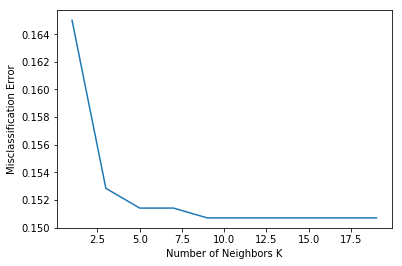

In [84]:
# plot misclassification error vs k 
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

### training the model with the optimal value of k found

In [16]:
classifier = KNeighborsClassifier(n_neighbors = optimal_k,n_jobs=4)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=9, p=2,
           weights='uniform')

In [101]:
?KNeighborsClassifier

### testing the model

In [17]:
y_pred = classifier.predict(X_test)

In [18]:
acc = accuracy_score(Y_test, y_pred, normalize=True) * float(100)
acc

85.16666666666667